[nltk_data] Downloading package stopwords to C:\Users\Jiacheng
[nltk_data]     Zheng\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


[('species', 2013), ('et', 1857), ('fish', 769), ('native', 722), ('invasive', 579), ('alien', 556), ('marine', 550), ('aquatic', 444), ('aquaculture', 442), ('introduced', 373)]


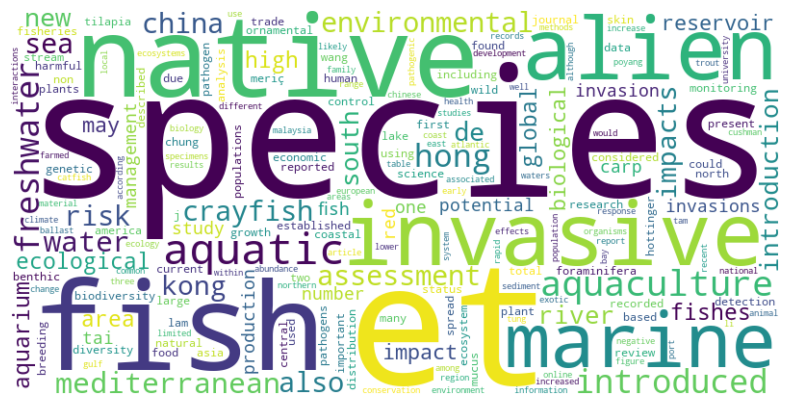

In [1]:
import fitz  # PyMuPDF
from collections import Counter
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os

# 下载NLTK停用词
nltk.download('stopwords')
from nltk.corpus import stopwords

# 指定英文停用词
stop_words = set(stopwords.words('english'))

def extract_text_from_pdfs(folder_path):
    """
    从指定文件夹中的多个PDF中提取文本
    """
    all_text = ""
    for filename in os.listdir(folder_path):
        if filename.endswith('.pdf'):
            pdf_path = os.path.join(folder_path, filename)
            with fitz.open(pdf_path) as doc:
                for page in doc:
                    all_text += page.get_text()
    return all_text

def clean_text(text):
    """
    清理文本：移除停用词，保留关键字
    """
    # 分词并去掉非字母单词
    words = [word.lower() for word in text.split() if word.isalpha()]
    # 去掉停用词
    filtered_words = [word for word in words if word not in stop_words]
    return filtered_words

def generate_wordcloud(word_counts):
    """
    根据词频生成词云
    """
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# 主流程
def main(folder_path):
    # 从PDF文件提取所有文本
    text = extract_text_from_pdfs(folder_path)
    # 清理和处理文本
    cleaned_words = clean_text(text)
    # 统计词频
    word_counts = Counter(cleaned_words)
    # 打印最常见的词语
    print(word_counts.most_common(10))
    # 生成词云
    generate_wordcloud(word_counts)

# 输入PDF所在文件夹路径
folder_path = r"C:\Users\Jiacheng Zheng\Downloads\PDF"  # 修改为你的PDF文件夹路径
main(folder_path)


In [1]:
import fitz  # PyMuPDF
from collections import Counter
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os
import spacy
import urllib3
import pandas as pd
import requests

urllib3.disable_warnings()

# Ensure the correct spaCy model is loaded
spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")

# Modify the maximum text length limit
nlp.max_length = 1500000

# Download NLTK stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

# Specify English stopwords
stop_words = set(stopwords.words('english'))

def extract_text_from_pdfs(folder_path):
    """
    Extract text from multiple PDFs in the specified folder.
    """
    all_text = ""
    for filename in os.listdir(folder_path):
        if filename.endswith('.pdf'):
            pdf_path = os.path.join(folder_path, filename)
            with fitz.open(pdf_path) as doc:
                for page in doc:
                    all_text += page.get_text()
    return all_text

def clean_text(text):
    """
    Clean the text: remove stopwords, keep keywords.
    """
    words = [word.lower() for word in text.split() if word.isalpha()]  # Tokenize and remove non-alphabetic words
    filtered_words = [word for word in words if word not in stop_words]  # Remove stopwords
    return filtered_words

def generate_wordcloud(word_counts, output_path):
    """
    Generate a word cloud from word frequencies and save it as an image.
    """
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
    wordcloud.to_file(output_path)  # Save as PNG file
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

def extract_keywords(text, top_n=10):
    """
    Extract keywords using spaCy.
    """
    doc = nlp(text)
    keywords = [chunk.text for chunk in doc.noun_chunks]
    counter = Counter(keywords)
    return counter.most_common(top_n)

def get_pos_distribution(text):
    """
    Get part-of-speech distribution statistics.
    """
    doc = nlp(text)
    pos_counts = Counter([token.pos_ for token in doc])
    return dict(pos_counts)

# Main process
def main(folder_path, output_excel):
    # Extract all text from PDF files
    text = extract_text_from_pdfs(folder_path)
    
    # Clean and process the text
    cleaned_words = clean_text(text)
    
    # Count word frequencies
    word_counts = Counter(cleaned_words)
    
    # Extract keywords
    keywords = extract_keywords(text, top_n=10)
    
    # Get part-of-speech distribution
    pos_distribution = get_pos_distribution(text)
    
    # Save results to an Excel file
    with pd.ExcelWriter(output_excel) as writer:
        # Save word counts
        word_counts_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])
        word_counts_df.to_excel(writer, index=False, sheet_name='Word Counts')
        
        # Save keywords
        keywords_df = pd.DataFrame(keywords, columns=['Keyword', 'Frequency'])
        keywords_df.to_excel(writer, index=False, sheet_name='Keywords')
        
        # Save POS distribution
        pos_distribution_df = pd.DataFrame(pos_distribution.items(), columns=['POS', 'Count'])
        pos_distribution_df.to_excel(writer, index=False, sheet_name='POS Distribution')
    
    print(f"Results have been saved to {output_excel}")

# Input the folder path containing PDFs
folder_path = r"C:\Users\Jiacheng Zheng\Downloads\PDF"  # Change to your PDF folder path
output_excel = r"C:\Users\Jiacheng Zheng\Downloads\NLP_Results.xlsx"  # Change to desired output path
main(folder_path, output_excel)


SystemExit: 1

C:\Users\Jiacheng Zheng\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3534: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
